In [59]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mushrooms.csv')

In [87]:
df.rename(index=str, columns={'class':'e_or_p'}, inplace=True)

In [88]:
train, test = train_test_split(df, test_size=.3, random_state=123, stratify=df[['e_or_p']])

In [89]:
train.shape

(5686, 23)

In [5]:
test.shape

(2438, 23)

### As a reminder, the mushroom's odor was a very strong indicator of class.  Let's visualize a few of the items we looked at in our other notebook.
### Below is the entire train dataframe by odor.  The hues are class (edible or poisonous).

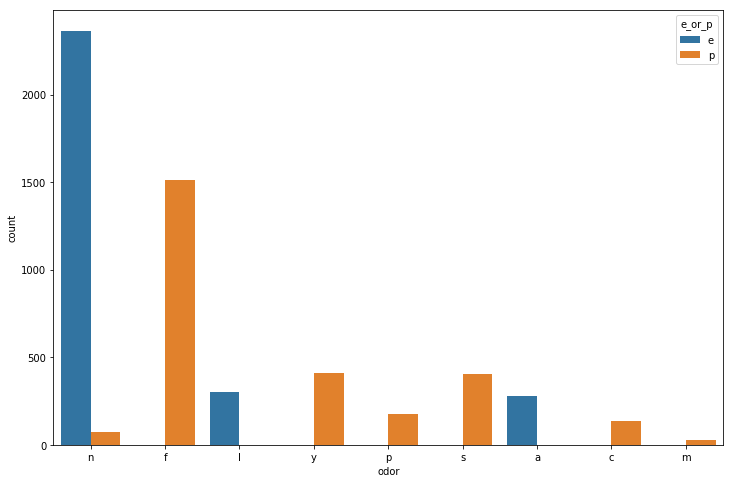

In [90]:
plt.figure(figsize=(12,8))
sns.countplot(x='odor', hue='e_or_p', data=train)

### This is taking a deeper look into our odorless mushrooms and focusing on cap-shape.

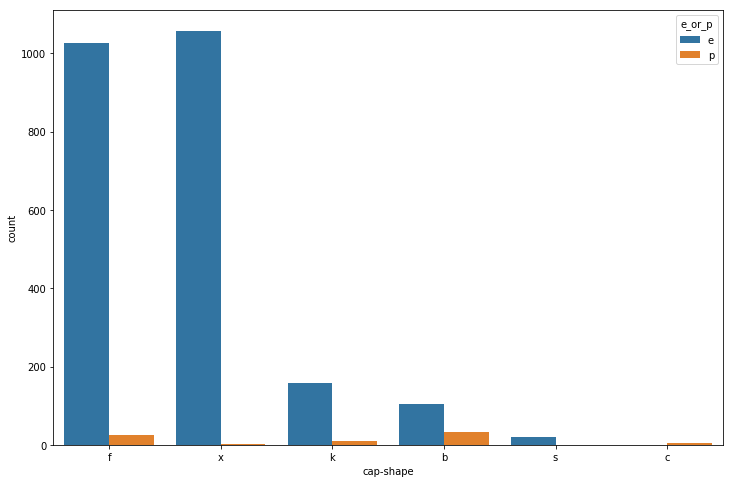

In [91]:
plt.figure(figsize=(12,8))
sns.countplot(x='cap-shape', hue='e_or_p', data=train[train.odor == 'n'])

### This is taking a deeper look into our odorless mushrooms and focusing on habitat.

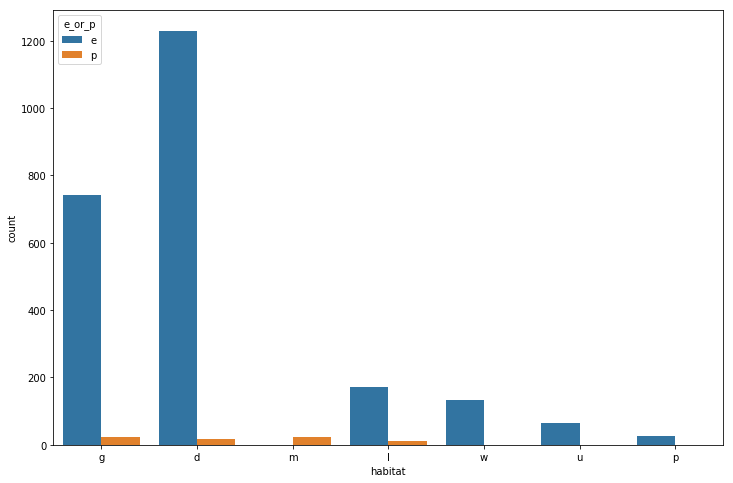

In [92]:
plt.figure(figsize=(12,8))
sns.countplot(x='habitat', hue='e_or_p', data=train[train.odor == 'n'])

### This is taking a deeper look into our odorless mushrooms and focusing on gill-color.

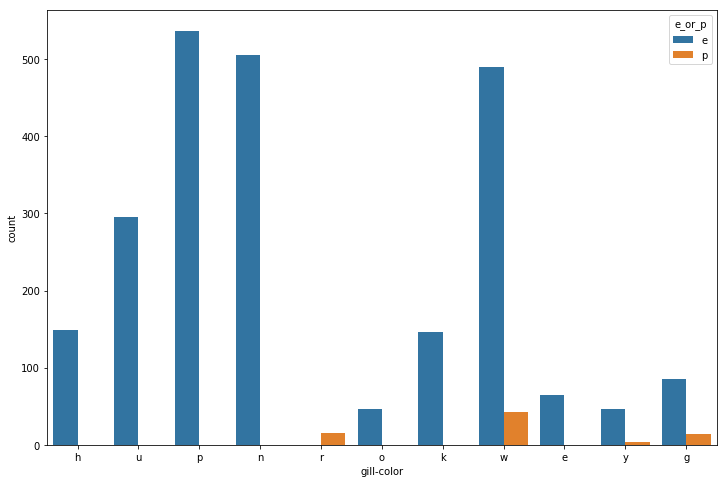

In [93]:
plt.figure(figsize=(12,8))
sns.countplot(x='gill-color', hue='e_or_p', data=train[train.odor == 'n'])

### Let's make a copy of the dataframe and encode each of the features.  These encoded columns can be later used for modeling.

In [94]:
categorical_feature_mask = df.dtypes==object

In [95]:
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [96]:
le = LabelEncoder()

In [97]:
df_enc = df.copy()

In [98]:
df_enc[categorical_cols] = df_enc[categorical_cols].apply(lambda col: le.fit_transform(col))
df_enc[categorical_cols].head()

,e_or_p,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Let's train/test split on the encoded df with the same random state and test size for reproducibility.

In [99]:
train, test = train_test_split(df_enc, test_size=.3, random_state=123, stratify=df_enc[['e_or_p']])

In [100]:
y_train = train[['e_or_p']]
y_test = test[['e_or_p']]

In [101]:
X_train = train[['odor', 'gill-color', 'cap-shape']]
X_test = test[['odor', 'gill-color', 'cap-shape']]

### Let's now try a logistic regrssion with multi class model.

In [102]:
log_reg = LogisticRegression(random_state=123, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

In [103]:
y_pred = log_reg.predict(X_train)

In [104]:
log_reg.predict_proba(X_train)

array([[0.43791195, 0.56208805],
       [0.08086359, 0.91913641],
       [0.16437796, 0.83562204],
       ...,
       [0.85948162, 0.14051838],
       [0.27468815, 0.72531185],
       [0.90445077, 0.09554923]])

In [105]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [106]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2945
           1       0.74      0.72      0.73      2741

   micro avg       0.74      0.74      0.74      5686
   macro avg       0.74      0.74      0.74      5686
weighted avg       0.74      0.74      0.74      5686



In [107]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

cm

,Pred -,Pred +
Actual -,2242,703
Actual +,763,1978


### Let's now try a decision tree model.

In [108]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123).fit(X_train, y_train)

In [109]:
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)

In [110]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [112]:
labels = sorted(y_train.e_or_p.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,2945,0
1,102,2639
